X.shape (224, 224)
Y.shape (224, 224)
XY.shape (50176, 2)
Z.shape (50176,)


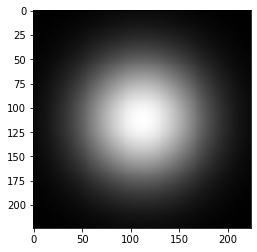

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
import Image_path_load
# 画像の大きさ
img_w, img_h = 224, 224

# 画素の座標一覧を作成する。
X, Y = np.mgrid[:img_h, :img_w]
print('X.shape', X.shape)  # X.shape (300, 300)
print('Y.shape', Y.shape)  # Y.shape (300, 300)
XY = np.c_[X.ravel(), Y.ravel()]#[0 0][0 1]～[223 222][223 223]
print('XY.shape', XY.shape)  # XY.shape (90000, 2)

# 各座標の2次元正規分布の密度関数の値を計算する。
mean = np.array([img_w, img_h]) / 2#真ん中　平均
sigma = np.eye(2) * 2000#[1,0] [0,1]標準偏差
Z = multivariate_normal.pdf(x=XY, mean=mean, cov=sigma)
print('Z.shape', Z.shape)  # Z.shape (90000,)
Z = Z.reshape(img_h, img_w)  # (img_h * img_w) -> (img_h, img_w)

def array_to_img(x):
    '''データを [0, 255] で表される画像に変換する。
    '''
    x += max(-np.min(x), 0)  # 非負の値にする。
    x_max = np.max(x)  # [0, 1] で正規化する。
    if x_max != 0:
        x /= x_max
    
    x *= 255  # [0, 255] にする。
    return x.astype(np.uint8)

# 正規分布は平均が一番値が大きいので、次の変換でその画素が 255 になることが保証される。
img = array_to_img(Z)

# 描画する。
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [15]:
import cv2
import os
import numpy as np
size =(224,224)
gausian1 = array_to_img(Z)
gausian = gausian1[:,:,np.newaxis]
#画像のファイルがあるパスを指定する。
DATA_PATH = "/home/cvmlab/Desktop/前処理/data"
DATA_RESULT_PATH = "/home/cvmlab/Desktop/前処理/result/"
#画像の名前を所得する関数を実行している。
image_path = Image_path_load.image_path_load(data_path=DATA_PATH).data_image_name()
#mainの処理
for path in image_path:
    img = cv2.imread(DATA_PATH+ "/" + path)
    img = cv2.resize(img, size) # resize
    imgs = (img/255) * gausian
    cv2.imwrite((DATA_RESULT_PATH + path), imgs)


In [14]:
import cv2
import os
import numpy as np
size =(224,224)
gausian1 = array_to_img(Z)
gausian = gausian1[:,:,np.newaxis]
for path in os.listdir(f'/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target'):
        img = cv2.imread(f'/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target/{path}',cv2.IMREAD_COLOR)
        img = cv2.resize(img, size) # resize
        imgs = (img/255) * gausian
        imgs = cv2.resize(imgs, size) 
        cv2.imwrite(f"/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target/{path}",imgs)

In [19]:
#回転させる
import cv2
import os
import numpy as np
size =(224,224)

for path in os.listdir(f'/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target'):
        img = cv2.imread(f'/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target/{path}',cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, size) # resize
        #高さを定義
        height = img.shape[0]                         
        #幅を定義
        width = img.shape[1]  
        #回転の中心を指定                          
        center = (int(width/2), int(height/2))
        angles = [0, 90,180,270]
        for angle,i in zip(angles,[0,1,2,3]):
            #getRotationMatrix2D関数を使用
            trans = cv2.getRotationMatrix2D(center, angle , 1.0)
            #アフィン変換
            image2 = cv2.warpAffine(img, trans, (width,height))
            o = str(i)+path
            cv2.imwrite(f"/home/cvmlab/Desktop/view2020/クラスタリング/dataB/images/target/{o}",image2)